In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import argparse
from os import path

from models.DBSCAN import DBSCAN

In [2]:
def Input(input_path):
	data = pd.read_csv(input_path, sep='\t', header=None).values

	obj_ids, points = data[:, 0], data[:, 1:]

	return obj_ids, points

In [3]:
def Output(input_path, output_path, n, clusters):
	file_name = path.splitext(path.basename(input_path))[0]
	file_path = path.join(output_path, file_name)

	clusters = sorted(clusters.items(), key=(lambda x: len(x[-1])), reverse=True)[:n]

	for i, (_, label) in enumerate(clusters):
		label.sort()
		with open(file_path + '_cluster_' + str(i) + '.txt', 'w') as file:
			for obj in label:
				file.write(str(obj) + '\n')

In [4]:
def Plot_img(input_path, output_path, points, labels):
	file_name = path.splitext(path.basename(input_path))[0]
	file_path = path.join(output_path, file_name)
	X = points[:, 0]
	Y = points[:, 1]

	plt.scatter(X, Y, 1, labels)
	plt.savefig(file_path + '.png')

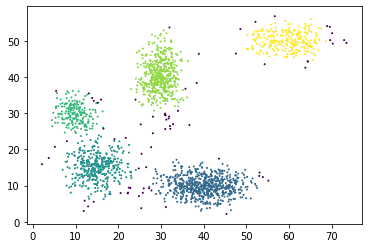

In [5]:
if __name__ == "__main__":
	# argument parser
	parser = argparse.ArgumentParser()
	parser.add_argument("input", type=str, help="Input data file name")
	parser.add_argument("n", type=int, help=" Number of clusters for the corresponding input data")
	parser.add_argument("Eps", type=float, help="Maximum radius of the neighborhood")
	parser.add_argument("Minpts", type=int, help="Minimum number of points in an Eps-neighborhood of a given point")
	parser.add_argument("--output_path", help="Output file path", type=str, default="")
	parser.add_argument("--img", help="Save input & cluster image", action='store_true')
    
    #args = parser.parse_args()

	obj_ids, points = Input('./data/input2.txt')
	
	dbscan = DBSCAN(points, 2, 7)
	clusters = dbscan.cluster()

	Output('./data/input2.txt', './test/', 2, clusters)

	if True:
		Plot_img('./data/input2.txt', './test/', points, dbscan.label)